### Überblick: Herkunfts- und Aufnahmeländer von Geflüchteten

Dieses Notebook zeigt eine einfache Auswertung der Daten zu Herkunfts- und
Aufnahmeländern von Geflüchteten. Es wird dargestellt, welche Länder
besonders viele Geflüchtete hervorbringen oder aufnehmen – sowohl in
absoluten Zahlen als auch im Verhältnis zur Bevölkerung.

Die Ergebnisse geben einen Überblick und dienen als Vorbereitung für die
spätere Analyse zum Zusammenhang zwischen Wohlstand und
Flüchtlingsaufnahme.


Der Datensatz wird geladen und das Herkunftsland bestimmt.
Anschließend wird für jedes Land die Gesamtzahl der Geflüchteten über alle
Jahre berechnet.

Die fünf Länder mit den höchsten absoluten Zahlen werden in einem
Balkendiagramm dargestellt.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/Origin_refugees_per_capita.csv"
df = pd.read_csv(path)

# Länder-Spalte automatisch finden
possible_cols = ["country", "Origin", "Location", "Country Name", "Origin_country"]
country_col = next((col for col in df.columns if col in possible_cols), None)
if country_col is None:
    raise ValueError("Keine passende Länder-Spalte gefunden.")

# prüfen ob Refugee_amount existiert
if "Refugee_amount" not in df.columns:
    raise ValueError("Spalte 'Refugee_amount' nicht gefunden.")

# Top 5 Herkunftsländer
origin_totals = df.groupby(country_col)["Refugee_amount"].sum().sort_values(ascending=False)
top_origins = origin_totals.head(5)

plt.figure(figsize=(10, 5))
plt.bar(top_origins.index, top_origins.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Anzahl Geflüchtete (absolut)")
plt.xlabel("Herkunftsland")
plt.title("Top 5 Herkunftsländer nach Gesamtzahl Geflüchteter")
plt.tight_layout()
plt.show()


Für jedes Herkunftsland wird der durchschnittliche Anteil an Geflüchteten
relativ zur Bevölkerung berechnet. Die fünf Länder mit den höchsten
Durchschnittswerten werden ausgewählt.

Die Verteilung dieser Anteile über die Jahre wird mithilfe von Boxplots
dargestellt, um Unterschiede und Streuungen sichtbar zu machen.







C:\Users\paulk\AppData\Local\Temp\ipykernel_87136\3990188955.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


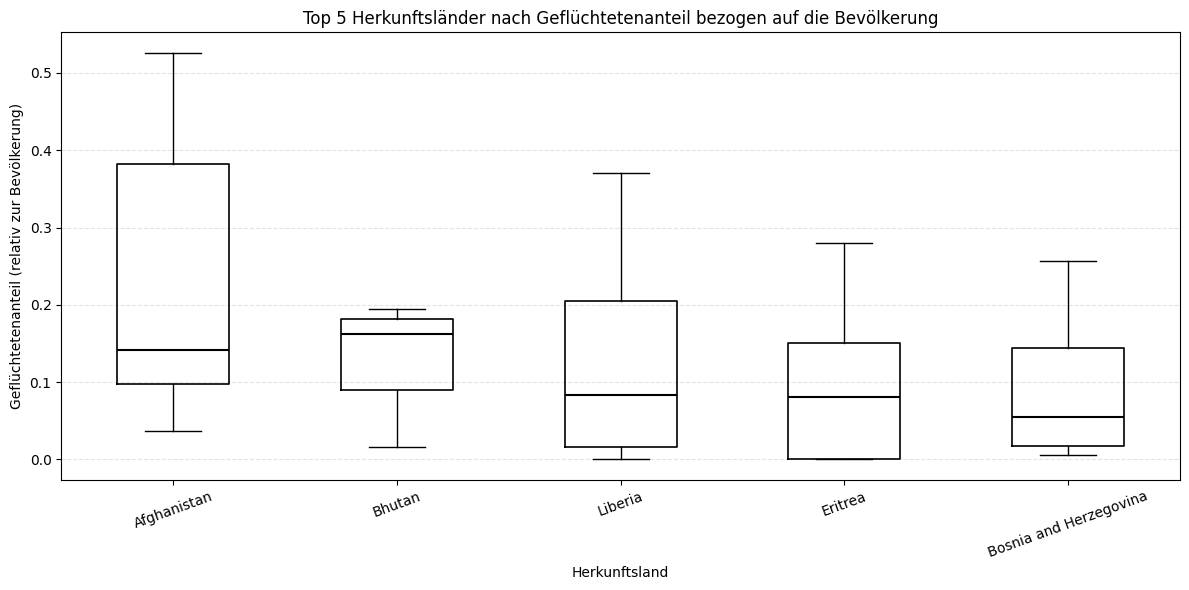

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/Origin_refugees_per_capita.csv"
df = pd.read_csv(path)

country_col = "country"
share_col = "refugee_share"

# Top 5 Länder mit höchstem Durchschnittsanteil Geflüchteter
avg_share = df.groupby(country_col)[share_col].mean().sort_values(ascending=False)
top5 = avg_share.head(5).index
df_top5 = df[df[country_col].isin(top5)]

plt.figure(figsize=(12, 6))
plt.boxplot(
    [df_top5[df_top5[country_col] == c][share_col] for c in top5],
    labels=top5,
    medianprops=dict(color="black", linewidth=1.5),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    boxprops=dict(color="black", linewidth=1.2)
)

plt.title("Top 5 Herkunftsländer nach Geflüchtetenanteil bezogen auf die Bevölkerung")
plt.xlabel("Herkunftsland")
plt.ylabel("Geflüchtetenanteil (relativ zur Bevölkerung)")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.35)

plt.tight_layout()
plt.show()


Der Datensatz zu Aufnahmeländern wird geladen und für jedes Land die
Gesamtzahl der aufgenommenen Geflüchteten über alle Jahre berechnet.

Die fünf Länder mit den höchsten absoluten Aufnahmezahlen werden in einem
Balkendiagramm dargestellt.

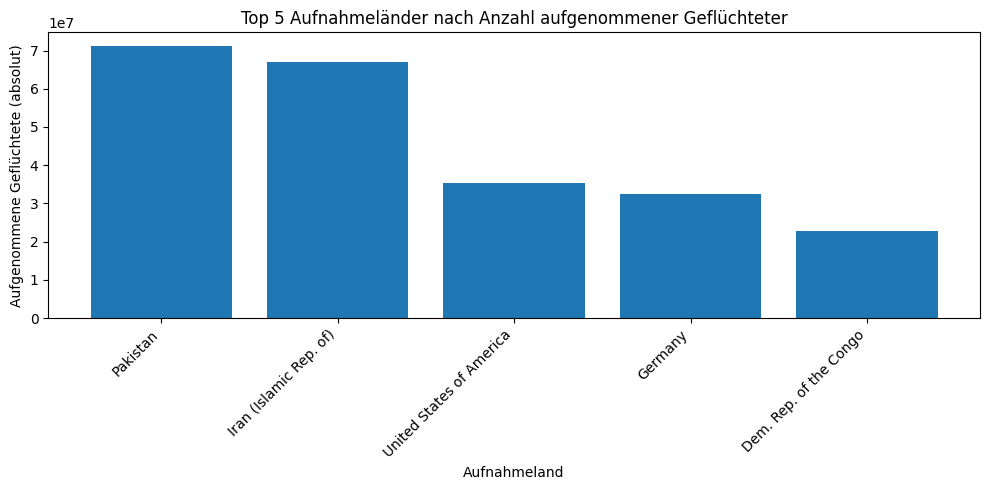

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/Destination_refugees_per_capita.csv"
df = pd.read_csv(path)

country_col = "country"
amount_col = "Refugee_amount"

# Top 5 Aufnahmeländer (absolute Zahlen)
dest_totals = df.groupby(country_col)[amount_col].sum().sort_values(ascending=False)
top5_amount = dest_totals.head(5)

plt.figure(figsize=(10, 5))
plt.bar(top5_amount.index, top5_amount.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Aufgenommene Geflüchtete (absolut)")
plt.xlabel("Aufnahmeland")
plt.title("Top 5 Aufnahmeländer nach Anzahl aufgenommener Geflüchteter")
plt.tight_layout()
plt.show()



Für jedes Aufnahmeland wird der durchschnittliche Geflüchtetenanteil
relativ zur Bevölkerung berechnet. Die fünf Länder mit den höchsten
Durchschnittswerten werden ausgewählt.

Die zeitliche Verteilung dieser Anteile wird mithilfe von Boxplots
visualisiert.








C:\Users\paulk\AppData\Local\Temp\ipykernel_87136\1273289217.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


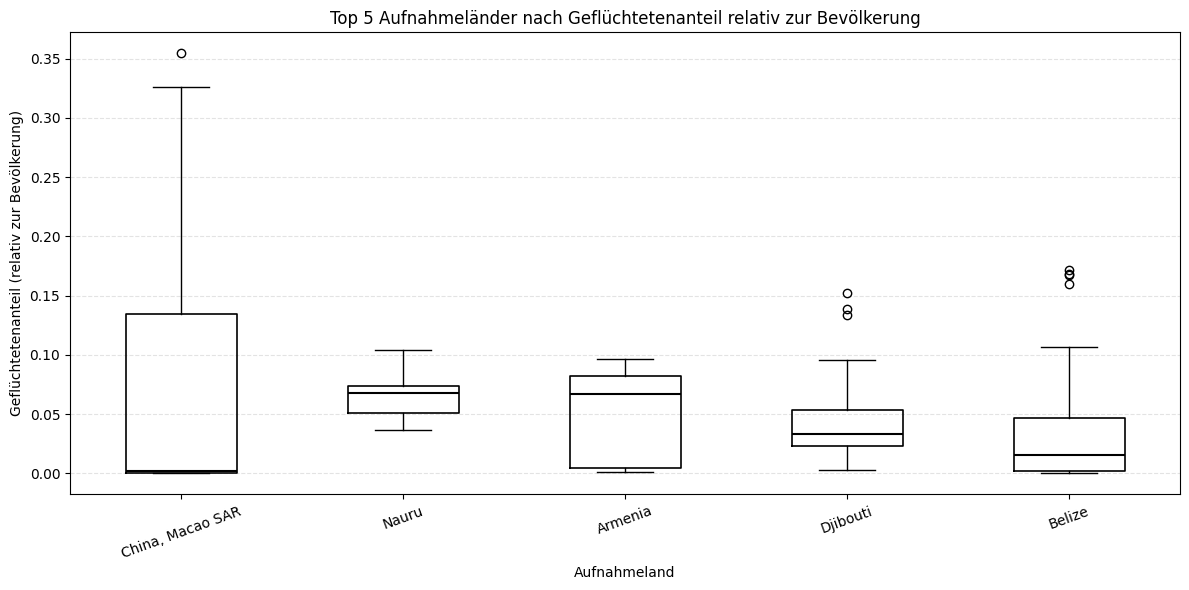

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/Destination_refugees_per_capita.csv"
df = pd.read_csv(path)

country_col = "country"
share_col = "refugee_share"

# Top 5 Länder nach geflüchtetenanteil (relativ)
avg_share = df.groupby(country_col)[share_col].mean().sort_values(ascending=False)
top5_share = avg_share.head(5).index

df_top5_share = df[df[country_col].isin(top5_share)]

plt.figure(figsize=(12, 6))
plt.boxplot(
    [df_top5_share[df_top5_share[country_col] == c][share_col] for c in top5_share],
    labels=top5_share,
    medianprops=dict(color="black", linewidth=1.5),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    boxprops=dict(color="black", linewidth=1.2)
)

plt.title("Top 5 Aufnahmeländer nach Geflüchtetenanteil relativ zur Bevölkerung")
plt.xlabel("Aufnahmeland")
plt.ylabel("Geflüchtetenanteil (relativ zur Bevölkerung)")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.35)

plt.tight_layout()
plt.show()
